<a href="https://colab.research.google.com/github/iannjari/neuralprophet/blob/main/NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import Dependencies

In [1]:
#Run only once per session
!pip install neuralprophet[live]

     |████████████████████████████████| 67 kB 2.6 MB/s 
     |████████████████████████████████| 165 kB 39.7 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet

# Fetch and prepare dataset

In [3]:
dataset=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550,556550,556550,556550,578424,586355,594037,600128,600128,600128,600128
278,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,78,93,106,129,141,177,211,248,272,304,359,380,425,435,459,465,465,465,490,498,501
279,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145,11145,11149,11166,11266,11553,11579,11604,11659,11664,11671
280,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,269991,274087,278276,281576,282904,284389,287110,289415,291

 The data has some columns in the 'Province/State' column that should be combined into one country's column.
 Also need to drop Lat and Long column since they're not useful for this task.

In [4]:
dataset=dataset.groupby('Country/Region').sum()
dataset=dataset.drop(columns=['Lat','Long'])
dataset

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550,556550,556550,556550,578424,586355,594037,600128,600128,600128,600128
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,78,93,106,129,141,177,211,248,272,304,359,380,425,435,459,465,465,465,490,498,501
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145,11145,11149,11166,11266,11553,11579,11604,11659,11664,11671


Rotate data so that Countries are column names and dates are just rows

In [5]:
dates=dataset.columns
dataset=dataset.transpose().reset_index(drop=True)
dates=pd.DataFrame(dates)
rotated_dataset= pd.concat([dates, dataset.diff()], axis=1, join='inner')
rotated_dataset=rotated_dataset.rename(columns={0:'Date'})
rotated_dataset

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,669.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2/9/22,811.0,700.0,585.0,181.0,29.0,0.0,0.0,27252.0,2811.0,11483.0,38309.0,7779.0,0.0,6818.0,8016.0,586.0,8254.0,22333.0,242.0,0.0,189.0,4016.0,1478.0,0.0,179417.0,441.0,7263.0,8.0,1043.0,0.0,9.0,223.0,0.0,10806.0,87.0,0.0,34253.0,663.0,8785.0,...,10314.0,21973.0,5125.0,476.0,0.0,5628.0,12.0,62839.0,1263.0,51.0,0.0,259.0,18182.0,29136.0,124.0,54.0,4.0,206.0,14822.0,194.0,0.0,20.0,756.0,4151.0,108563.0,187299.0,68.0,39569.0,1538.0,67874.0,8100.0,778.0,0.0,1560.0,23956.0,7682.0,0.0,26.0,414.0,137.0
750,2/10/22,898.0,604.0,518.0,85.0,21.0,0.0,468.0,25110.0,2842.0,31250.0,35250.0,7632.0,38.0,6104.0,7264.0,519.0,8463.0,19616.0,215.0,0.0,131.0,0.0,1313.0,2488.0,162636.0,628.0,6278.0,3.0,1307.0,60.0,7.0,262.0,0.0,10923.0,0.0,0.0,38070.0,369.0,8269.0,...,10686.0,28236.0,12209.0,408.0,0.0,3169.0,7.0,53055.0,1297.0,110.0,0.0,205.0,16968.0,26334.0,135.0,83.0,6.0,0.0,15242.0,216.0,8.0,31.0,738.0,3823.0,98602.0,170862.0,49.0,43477.0,1588.0,164528.0,8812.0,692.0,0.0,2049.0,26032.0,6091.0,0.0,25.0,506.0,300.0
751,2/11/22,492.0,0.0,532.0,66.0,27.0,0.0,10.0,16503.0,2676.0,22564.0,32712.0,6603.0,32.0,5750.0,5268.0,403.0,8611.0,15242.0,210.0,54.0,185.0,1969.0,1338.0,0.0,163786.0,981.0,6531.0,3.0,1607.0,40.0,6.0,274.0,999

In [6]:
# Different country can be sampled by changing the column
data=rotated_dataset[['Date','US']]
data.columns=['ds','y']
data=data.dropna()
data[1:].head()

,ds,y
2,1/24/20,1.0
3,1/25/20,0.0
4,1/26/20,3.0
5,1/27/20,0.0
6,1/28/20,0.0


# Train Model

In [7]:
m = NeuralProphet(daily_seasonality=True)
m.fit(data[1:],freq='D',epochs=1000)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/244 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.59E-02, min: 1.00E+00


  0%|          | 0/244 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.59E-02, min: 1.29E+00


  0%|          | 0/244 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.59E-02, min: 1.41E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.59E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [02:04<00:00,  8.01it/s, SmoothL1Loss=0.0283, MAE=4.06e+4, RMSE=6.58e+4, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,2.365465,867757.589096,958998.428191,0.0
1,2.240092,828714.930186,922140.105053,0.0
2,2.116357,790013.050532,885699.377660,0.0
3,1.993915,752164.075798,848501.821809,0.0
4,1.872547,714478.509309,808190.796543,0.0
...,...,...,...,...
995,0.028269,40606.445354,63929.492769,0.0
996,0.028269,40605.023105,65657.832281,0.0
997,0.028269,40604.784242,64699.001579,0.0
998,0.028269,40604.547083,65067.642994,0.0


To observe the metrics during training, run this cell

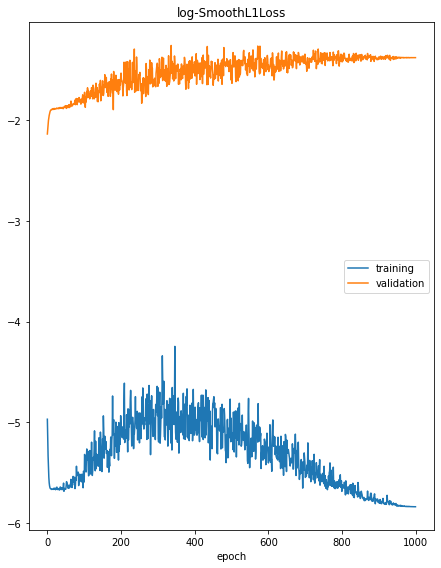

Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:36<00:00, 10.41it/s, SmoothL1Loss=0.00291, MAE=1.47e+4, RMSE=2.19e+4, RegLoss=0, MAE_val=1.92e+5, RMSE_val=2.27e+5, SmoothL1Loss_val=0.252]


In [8]:
df_train, df_test = m.split_df(data[1:], freq='D')

metrics = m.fit(df_train, freq='D', epochs=1000, validation_df=df_test, plot_live_loss=True)

In [13]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
1999,0.002908,14688.557393,21929.236516,0.0,NaN,NaN,NaN


# Perform predictions

In [10]:
future=m.make_future_dataframe(data,periods=14)
forecast=m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2022-02-14,None,377139.00000,NaN,543822.9375,86742.070312,-3140.236816,-250285.796875
1,2022-02-15,None,376244.56250,NaN,543799.8125,83059.679688,-329.135040,-250285.796875
2,2022-02-16,None,376643.71875,NaN,543776.6875,79452.476562,3700.371338,-250285.796875
3,2022-02-17,None,376004.87500,NaN,543753.5625,75929.234375,6607.943359,-250285.796875
4,2022-02-18,None,382333.90625,NaN,543730.4375,72497.984375,16391.289062,-250285.796875
5,2022-02-19,None,358197.09375,NaN,543707.3125,69166.062500,-4390.472168,-250285.796875
6,2022-02-20,None,340498.65625,NaN,543684.1250,65940.046875,-18839.761719,-250285.796875
7,2022-02-21,None,353060.81250,NaN,543661.0625,62825.812500,-3140.236816,-250285.796875
8,2022-02-22,None,352851.37500,NaN,543637.8750,59828.402344,-329.135040,-250285.796875
9,2022-02-23,None,353981.43750,NaN,543614.7500,56952.105469,3700.371338,-250285.796875


In [15]:
forecast['yhat1'].astype(int)

0     377139
1     376244
2     376643
3     376004
4     382333
5     358197
6     340498
7     353060
8     352851
9     353981
10    354114
11    361250
12    337950
13    321113
Name: yhat1, dtype: int64

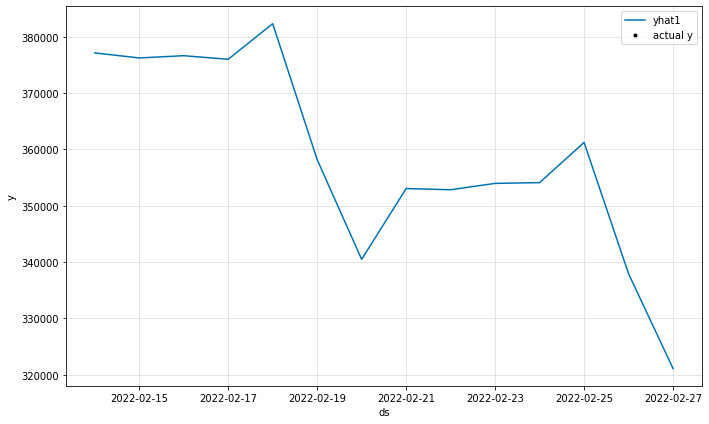

In [12]:
fig1 = m.plot(forecast)

To return 'Date' and 'Predicted Cases' (as integers);

In [16]:
results_df=forecast[['ds','yhat1']]
results_df['yhat1']=forecast['yhat1'].astype(int)
results_df.columns=['Date','Predicted Cases']
results_df

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,Date,Predicted Cases
0,2022-02-14,377139
1,2022-02-15,376244
2,2022-02-16,376643
3,2022-02-17,376004
4,2022-02-18,382333
5,2022-02-19,358197
6,2022-02-20,340498
7,2022-02-21,353060
8,2022-02-22,352851
9,2022-02-23,353981
